# Simple CNN for MNIST 

Using the MNIST dataset (70 000 pictures of hand-written digits) we will train a simple CNN, which is able to predict a digit given a picture of a hand-written digit with 99% accuracy. 

In [13]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

Network parameters:

In [2]:
batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

Prepare data into training and test set.

In [3]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
input_shape = (1, img_rows, img_cols)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


Build the CNN. 

In [7]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

Show a summary of the model parameters. 

In [8]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 26, 26)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 32, 26, 26)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 24, 24)    9248        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 32, 24, 24)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

And now train the model and evaluate on the test set. 

In [9]:
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 115s - loss: 0.3605 - acc: 0.8891 - val_loss: 0.0885 - val_acc: 0.9721
Epoch 2/12
60000/60000 [==============================] - 93s - loss: 0.1356 - acc: 0.9598 - val_loss: 0.0622 - val_acc: 0.9791
Epoch 3/12
60000/60000 [==============================] - 94s - loss: 0.1051 - acc: 0.9685 - val_loss: 0.0534 - val_acc: 0.9825
Epoch 4/12
60000/60000 [==============================] - 94s - loss: 0.0880 - acc: 0.9740 - val_loss: 0.0446 - val_acc: 0.9844
Epoch 5/12
60000/60000 [==============================] - 93s - loss: 0.0803 - acc: 0.9765 - val_loss: 0.0399 - val_acc: 0.9864
Epoch 6/12
60000/60000 [==============================] - 93s - loss: 0.0720 - acc: 0.9785 - val_loss: 0.0380 - val_acc: 0.9876
Epoch 7/12
60000/60000 [==============================] - 93s - loss: 0.0641 - acc: 0.9805 - val_loss: 0.0366 - val_acc: 0.9879
Epoch 8/12
60000/60000 [=============================

In [10]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0309755772928
Test accuracy: 0.9897


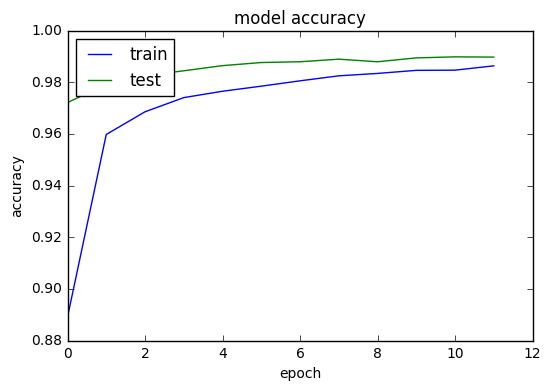

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()